In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('retail_sales_dataset.csv')

In [3]:
df.shape

(1000, 9)

In [4]:
df.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


In [6]:
df.isnull().sum()

Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64

In [7]:
df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df['Date'].dt.month
df['Day_of_Week'] = df['Date'].dt.day_name()

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Transaction ID    1000 non-null   int64         
 1   Date              1000 non-null   datetime64[ns]
 2   Customer ID       1000 non-null   object        
 3   Gender            1000 non-null   object        
 4   Age               1000 non-null   int64         
 5   Product Category  1000 non-null   object        
 6   Quantity          1000 non-null   int64         
 7   Price per Unit    1000 non-null   int64         
 8   Total Amount      1000 non-null   int64         
 9   Month             1000 non-null   int32         
 10  Day_of_Week       1000 non-null   object        
dtypes: datetime64[ns](1), int32(1), int64(5), object(4)
memory usage: 82.2+ KB


In [9]:
numeric_col=['Total Amount', 'Quantity', 'Price per Unit', 'Age']
df[numeric_col].describe()

,Total Amount,Quantity,Price per Unit,Age
count,1000.000000,1000.000000,1000.000000,1000.00000
mean,456.000000,2.514000,179.890000,41.39200
std,559.997632,1.132734,189.681356,13.68143
min,25.000000,1.000000,25.000000,18.00000
25%,60.000000,1.000000,30.000000,29.00000
50%,135.000000,3.000000,50.000000,42.00000
75%,900.000000,4.000000,300.000000,53.00000
max,2000.000000,4.000000,500.000000,64.00000


In [10]:
df_ts = df.set_index('Date')
monthly_sales = df_ts['Total Amount'].resample('MS').sum()
monthly_sales.head()

Date
2023-01-01    35450
2023-02-01    44060
2023-03-01    28990
2023-04-01    33870
2023-05-01    53150
Freq: MS, Name: Total Amount, dtype: int64

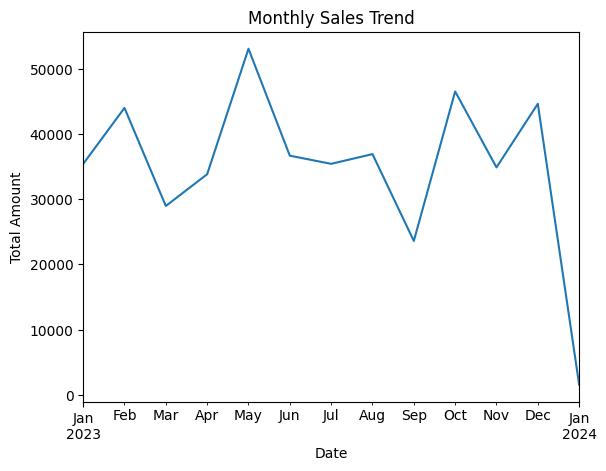

Day_of_Week
Saturday     78815
Monday       70250
Tuesday      69440
Friday       66290
Wednesday    58770
Sunday       58600
Thursday     53835
Name: Total Amount, dtype: int64

In [11]:
import matplotlib.pyplot as plt

monthly_sales.plot(title='Monthly Sales Trend')
plt.xlabel('Date')
plt.ylabel('Total Amount')
plt.show()

day_of_week_sales = df.groupby('Day_of_Week')['Total Amount'].sum().sort_values(ascending=False)
day_of_week_sales

In [12]:
prod_perf = df.groupby('Product Category').agg(
    Total_Amt=('Total Amount', 'sum'),
    Total_Qty=('Quantity', 'sum'),
    Avg_Price=('Price per Unit', 'mean')
).sort_values(by='Total_Amt', ascending=False)

print("Product categories by total amount")
print(prod_perf)

Product categories by total amount
                  Total_Amt  Total_Qty   Avg_Price
Product Category                                  
Electronics          156905        849  181.900585
Clothing             155580        894  174.287749
Beauty               143515        771  184.055375


In [13]:
age_bins = [18, 25, 40, 55, 70]
age_labels = ['18-25 (Young Adult)', '26-40 (Middle Adult)', '41-55 (Mature Adult)', '56+ (Senior)']
df['Age_Group'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, right=False)

age_grp_sales = df.groupby('Age_Group', observed=True)['Total Amount'].sum().sort_values(ascending=False)
print("Total revenue by age")
print(age_grp_sales)

Total revenue by age
Age_Group
41-55 (Mature Adult)    146330
26-40 (Middle Adult)    144830
56+ (Senior)             90190
18-25 (Young Adult)      74650
Name: Total Amount, dtype: int64


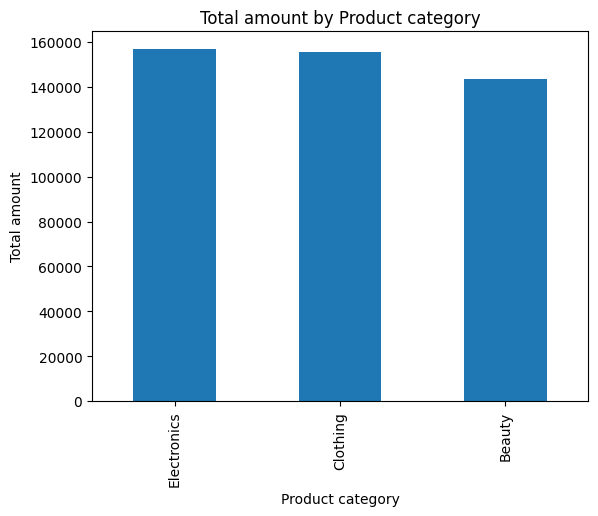

In [15]:
prod_perf['Total_Amt'].plot(kind='bar')
plt.title('Total amount by Product category')
plt.xlabel('Product category')
plt.ylabel('Total amount')
plt.show()

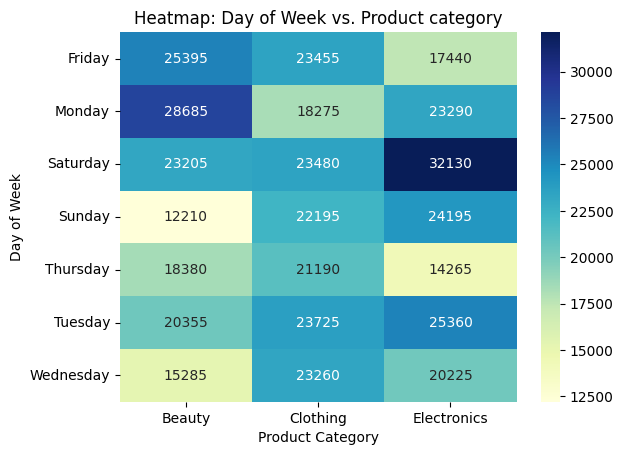

In [16]:
heatmap_data = df.pivot_table(
    index='Day_of_Week', 
    columns='Product Category', 
    values='Total Amount', 
    aggfunc='sum'
)

import seaborn as sns 
sns.heatmap(heatmap_data, annot=True, fmt=".0f", cmap="YlGnBu")
plt.title('Heatmap: Day of Week vs. Product category')
plt.ylabel('Day of Week')
plt.xlabel('Product Category')
plt.show()